<h1><center>PART A</center></h1>

### 1) Import numpy, pandas, seaborn, matplotlib

In [5]:
# your code here
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt


Attribute Information: 
> 1. age 
> 2. sex 
> 3. chest pain type (4 values) 
> 4. resting blood pressure 
> 5. serum cholestoral in mg/dl 
> 6. fasting blood sugar > 120 mg/dl
> 7. resting electrocardiographic results (values 0,1,2)
> 8. maximum heart rate achieved 
> 9. exercise induced angina 
> 10. oldpeak = ST depression induced by exercise relative to rest 
> 11. the slope of the peak exercise ST segment 
> 12. number of major vessels (0-3) colored by flourosopy 
> 13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

### 2) Read the heart.csv file into a dataframe called df, and  view a 2% random sample of the data

In [6]:
# your code here
df=pd.read_csv('kaggleUCI/kaggleUCI/heart.csv')
df.sample(frac=0.02)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
115,37,0,2,120,215,0,1,170,0,0.0,2,0,2,1
178,43,1,0,120,177,0,0,120,1,2.5,1,0,3,0
109,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
32,44,1,1,130,219,0,0,188,0,0.0,2,0,2,1


### 3) Split the data into Xtrain, Xtest, ytrain, ytest - with 30% in test, and random_state=1

In [7]:
# your code here
from sklearn.model_selection import train_test_split

#set up data
X=df.drop(['target'],axis=1)
y=df['target']
#split data
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=1)

X_train=X_train.copy()
X_test=X_test.copy()
y_train=y_train.copy()
y_test=y_test.copy()

### 4) Create two lists called numeric_features (with age, trestbps, chol, thalach, oldspeak), and categorical_features (with sex, cp, fbs, restecg, exang, slope, ca, thal)

In [8]:
# your code here
numeric_features=['age','trestbps','chol','thalach','oldpeak']
categorical_features=['sex','cp','fbs','restecg','exang','slope','ca','thal']

### 5) Get basic stats on Xtrain (such as count, mean, std, etc)

In [9]:
# your code here
X_train.describe()
X_train.shape

(212, 13)

### 6) Check if there are any NaNs in any of the columns in Xtrain

In [10]:
# your code here
X_train.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

### 7) Create an annotated heatmap of the correlation between the numeric features in Xtrain

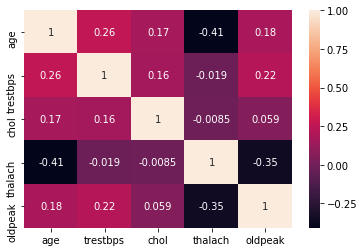

In [11]:
# your code here
corr=X_train[numeric_features].corr()

sns.heatmap(corr,xticklabels=corr.columns, yticklabels=corr.columns,annot=True)

### 8) Standard Scale all of the numeric features in Xtrain, include transformed numeric features in Xtrain, and drop original numeric features in Xtrain

In [12]:
# your code here
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
Xcat=pd.DataFrame(ss.fit_transform(X_train[numeric_features]), index=X_train.index, columns=['scale_'+x for x in numeric_features])
X_train= pd.concat([X_train,Xcat],axis=1)
X_train= X_train.drop(numeric_features,axis=1)
X_train.head()

E:\wzm\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
E:\wzm\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,sex,cp,fbs,restecg,exang,slope,ca,thal,scale_age,scale_trestbps,scale_chol,scale_thalach,scale_oldpeak
34,1,3,0,0,1,2,1,2,-0.334915,-0.332611,-0.655815,-1.074173,0.356309
185,1,0,0,0,0,2,1,2,-1.097207,-1.071867,1.000106,0.121905,-0.931786
187,1,0,0,0,1,1,1,3,-0.008219,-0.389477,0.483975,-1.757646,1.092364
147,0,3,0,1,0,2,0,2,0.645174,1.089034,-0.075168,0.890812,-0.103725
202,1,0,0,0,1,2,0,3,0.427376,1.089034,0.569996,-1.672212,-0.195731


In [13]:
# leave this cell blank

### 9) OneHotEncode all of the categorical features in Xtrain, include transformed categorical features in Xtrain, and drop original categorical features in Xtrain

In [14]:
# your code here
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(sparse=False, dtype=int,handle_unknown='ignore')
Xcat=pd.DataFrame(ohe.fit_transform(X_train[categorical_features]), columns=ohe.get_feature_names(),index=X_train.index)
X_train=pd.concat([X_train,Xcat],axis=1)
X_train=X_train.drop(categorical_features,axis=1)
X_train.head()

,scale_age,scale_trestbps,scale_chol,scale_thalach,scale_oldpeak,x0_0,x0_1,x1_0,x1_1,x1_2,...,x5_2,x6_0,x6_1,x6_2,x6_3,x6_4,x7_0,x7_1,x7_2,x7_3
34,-0.334915,-0.332611,-0.655815,-1.074173,0.356309,0,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0
185,-1.097207,-1.071867,1.000106,0.121905,-0.931786,0,1,1,0,0,...,1,0,1,0,0,0,0,0,1,0
187,-0.008219,-0.389477,0.483975,-1.757646,1.092364,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1
147,0.645174,1.089034,-0.075168,0.890812,-0.103725,1,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0
202,0.427376,1.089034,0.569996,-1.672212,-0.195731,0,1,1,0,0,...,1,1,0,0,0,0,0,0,0,1


In [15]:
# leave this cell blank

### 10) Fit a Logistic Regression Model to training data with random_state=1

In [16]:
# your code here
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(random_state=1, solver='lbfgs', multi_class='auto',class_weight=None,max_iter=100)
log.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=1, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [17]:
# leave this cell blank

### 11) Standard Scale all of the numeric features in Xtest, include transformed numeric features in Xtest, and drop original numeric features in Xtest

In [18]:
# your code here
Xcat=pd.DataFrame(ss.transform(X_test[numeric_features]),index=X_test.index, columns=['scale_'+x for x in numeric_features])
X_test= pd.concat([X_test,Xcat],axis=1)
X_test= X_test.drop(numeric_features,axis=1)
X_test.head()

E:\wzm\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


,sex,cp,fbs,restecg,exang,slope,ca,thal,scale_age,scale_trestbps,scale_chol,scale_thalach,scale_oldpeak
204,0,0,0,0,0,0,3,3,0.862972,1.657692,-1.709583,-0.219832,4.772635
159,1,1,0,0,0,2,0,3,0.209579,-0.048282,-0.483772,0.549075,-0.931786
219,1,0,1,0,1,2,2,3,-0.661612,-0.048282,0.268920,-0.006246,-0.931786
174,1,0,0,0,1,1,2,3,0.645174,-0.048282,-0.806354,-0.775153,1.276377
184,1,0,0,0,0,1,0,3,-0.443814,1.089034,-0.010651,-0.946022,1.460391


In [19]:
# leave this cell blank

### 12) OneHotEncode all of the categorical features in Xtest, include transformed categorical features in Xtest, and drop original categorical features in Xtest

In [20]:
# your code here
Xcat=pd.DataFrame(ohe.transform(X_test[categorical_features]),columns=ohe.get_feature_names(), index=X_test.index)
X_test=pd.concat([X_test,Xcat],axis=1)
X_test=X_test.drop(categorical_features,axis=1)
X_test.head()

,scale_age,scale_trestbps,scale_chol,scale_thalach,scale_oldpeak,x0_0,x0_1,x1_0,x1_1,x1_2,...,x5_2,x6_0,x6_1,x6_2,x6_3,x6_4,x7_0,x7_1,x7_2,x7_3
204,0.862972,1.657692,-1.709583,-0.219832,4.772635,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
159,0.209579,-0.048282,-0.483772,0.549075,-0.931786,0,1,0,1,0,...,1,1,0,0,0,0,0,0,0,1
219,-0.661612,-0.048282,0.268920,-0.006246,-0.931786,0,1,1,0,0,...,1,0,0,1,0,0,0,0,0,1
174,0.645174,-0.048282,-0.806354,-0.775153,1.276377,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,1
184,-0.443814,1.089034,-0.010651,-0.946022,1.460391,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,1


In [21]:
# leave this cell blank

### 13) Predict and Evaluate Logisitic Regression Model on Xtest

In [22]:
# your code here
y_pred=log.predict(X_test)
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.classification_report(y_test,y_pred))


Accuracy: 0.8021978021978022
[[31 10]
 [ 8 42]]
              precision    recall  f1-score   support

           0       0.79      0.76      0.77        41
           1       0.81      0.84      0.82        50

   micro avg       0.80      0.80      0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91



# KNN- Classifier

In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 9) 
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)



In [40]:
# evaluation
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test,prediction))
print(metrics.confusion_matrix(y_test,prediction))
print(metrics.classification_report(y_test,prediction))


Accuracy: 0.8131868131868132
[[33  8]
 [ 9 41]]
              precision    recall  f1-score   support

           0       0.79      0.80      0.80        41
           1       0.84      0.82      0.83        50

   micro avg       0.81      0.81      0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



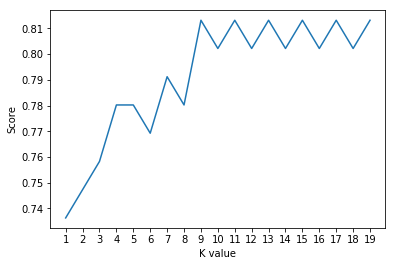

Maximum KNN Score is 81.32%


In [41]:
# try ro find best k value
import matplotlib.pyplot as plt

scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(X_train, y_train)
    scoreList.append(knn2.score(X_test, y_test))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

print("Maximum KNN Score is {:.2f}%".format((max(scoreList))*100))


## SVM 

In [42]:
from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(X_train, y_train)
prediction=svm.predict(X_test)

E:\wzm\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [46]:
from sklearn import metrics

print(metrics.accuracy_score(y_test,prediction))
print(metrics.confusion_matrix(y_test,prediction))
print(metrics.classification_report(y_test,prediction))


0.8241758241758241
[[31 10]
 [ 6 44]]
              precision    recall  f1-score   support

           0       0.84      0.76      0.79        41
           1       0.81      0.88      0.85        50

   micro avg       0.82      0.82      0.82        91
   macro avg       0.83      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91



In [48]:
# Model Comparison

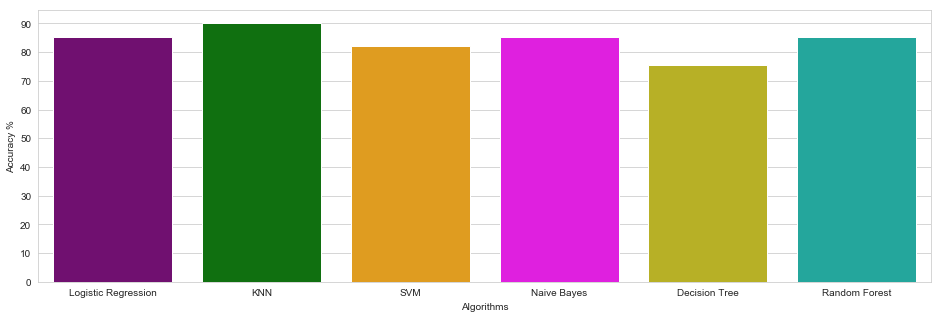

In [49]:
methods = ["Logistic Regression", "KNN", "SVM", "Naive Bayes", "Decision Tree", "Random Forest"]
accuracy = [85.25, 90.16, 81.97, 85.25, 75.41, 85.25]
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=methods, y=accuracy, palette=colors)
plt.show()

<h1><center>Part B</center></h1> -Pipeline

### 14) (a) Read heart.csv file into a dataframe called df; (b) Split the data into Xtrain, Xtest, ytrain, ytest - with 30% in test, and random_state=1; (c) Create two lists called numeric_features (with age, trestbps, chol, thalach, oldspeak), and categorical_features (with sex, cp, fbs, restecg, exang, slope, ca, thal)

In [237]:
# your code here
#a)
df=pd.read_csv('kaggleUCI/kaggleUCI/heart.csv')

#b)
#set up data
X=df.drop(['target'],axis=1)
y=df['target']
#split data
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=1)

X_train=X_train.copy()
X_test=X_test.copy()
y_train=y_train.copy()
y_test=y_test.copy()

#c):
numeric_features=['age','trestbps','chol','thalach','oldpeak']
categorical_features=['sex','cp','fbs','restecg','exang','slope','ca','thal']

In [238]:
# leave this cell blank

### 15) Create a pipeline called "numeric_transformer" with a StandardScaler step called "ss" (use the same parameters that you used in Part A above)

In [239]:
# your code here
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler


numeric_transformer=Pipeline(steps=[
    ('ss',StandardScaler())])

In [240]:
# leave this cell blank

### 16) Create a pipeline called "categorical_transformer" with a OneHotEncoder step called "ohe" (use the same parameters that you used in Part A above)

In [241]:
# your code here
from sklearn.preprocessing import OneHotEncoder

categorical_transformer=Pipeline(steps=[
    ('ohe',OneHotEncoder(sparse=False, dtype=int,handle_unknown='ignore'))
])

In [242]:
# leave this cell blank

### 17) Create a column transformer called "preprocessor" with two transformers: (a) the first transformer called "num" which uses the numeric_transformer (that you defined above) on the numeric_features; and (b) the second transformer called "cat" which uses the categorical_transformer (that you defined above) on the categorical_features

In [243]:
# your code here

from sklearn.compose import ColumnTransformer
preprocessor=ColumnTransformer(
transformers=[
    ('nums',numeric_transformer, numeric_features),
    ('cat', categorical_transformer,categorical_features)
])


In [244]:
# leave this cell blank

### 18) Create a pipeline called "clf" with two steps: (a) the first step called "pp" which invokes the preprocessor you defined above; and (b) the second step called "lr" which involkes a logisitc regression model  (use the same parameters that you used in Part A above)

In [245]:
# your code here
from sklearn.linear_model import LogisticRegression

clf= Pipeline(steps=[
    ('pp',preprocessor),
    ('lr',LogisticRegression(random_state=1, solver='lbfgs', multi_class='auto',class_weight=None,max_iter=100))
])

In [246]:
# leave this cell blank

### 19) Fit the clf pipeline to the training data

In [247]:
# your code here
clf.fit(X_train,y_train)

E:\wzm\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
E:\wzm\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Pipeline(memory=None,
     steps=[('pp', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('nums', Pipeline(memory=None,
     steps=[('ss', StandardScaler(copy=True, with_mean=True, with_std=True))]), ['age', 'trestbps', 'chol', 'thalach', 'oldpea..., penalty='l2', random_state=1, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False))])

In [ ]:
# leave this cell blank

### 20) Predict and Evaluate clf pipeline on Xtest (you should end up with same results as in Part A above)

In [248]:
# your code here
y_pred=clf.predict(X_test)

from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.classification_report(y_test,y_pred))


Accuracy: 0.8021978021978022
[[31 10]
 [ 8 42]]
              precision    recall  f1-score   support

           0       0.79      0.76      0.77        41
           1       0.81      0.84      0.82        50

   micro avg       0.80      0.80      0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91



E:\wzm\Anaconda3\lib\site-packages\sklearn\pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [ ]:
# leave this cell blank